                                             **Decision Tree**

**Step1 : Data Preprocessing**

**Objective:**
The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.


In [65]:
#Loading data

import pandas as pd
import numpy as np

dile_path = ('C:\\Users\\rishi\\OneDrive\\Desktop\\DS Assigments\\heart_disease.xlsx')
df = pd.read_excel('C:\\Users\\rishi\\OneDrive\\Desktop\\DS Assigments\\heart_disease.xlsx')

print(df.head())
print("Shape of the dataset:", df.shape)

        age                                       Age in years
0    Gender                       Gender ; Male - 1, Female -0
1        cp                                    Chest pain type
2  trestbps                             Resting blood pressure
3      chol                                cholesterol measure
4       fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...
Shape of the dataset: (12, 2)


**Step: 2**

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df.isnull().sum())

print(df.describe())


age             0
Age in years    0
dtype: int64
           age                  Age in years
count       12                            12
unique      12                            12
top     Gender  Gender ; Male - 1, Female -0
freq         1                             1


**Observation**

'df.isnull().sum()' is used to check for missing values in each column of the dataset
The output shows the count of missing values for each column and helps to identify any data quality issues that need to be addressed before  further analysis

The 'df.describe()' provides a summary of the dataset's numerical features including count, mean, standard deviation, minimum, maximum, and the quartiles
It helps in understanding the distribution of the data identifying potential outliers and gaining insights into the central tendency and spread of the features

In [67]:
print(df.columns)

Index(['age', 'Age in years'], dtype='object')


In [68]:
print(df.dtypes)

age             object
Age in years    object
dtype: object


In [83]:
df.columns = df.columns.str.strip()

'df.columns.str.strip()' is used to remove any leading  spaces from the column names in tha DataFrame this checks that the column names are clean and consistent preventing errors when accessing  or manipulating data

In [85]:
columns_to_check =['age', 'Age in years']
missing_columns = [col for col in columns_to_check if col not in df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print(df[columns_to_check].head())

Missing columns: ['age', 'Age in years']


**Observation**

It checks whether the columns 'age' and 'Age in years' exist in the DataFrame 'df'. It creates a list of 'missing_columns' that stores the names of any columns not found in the DataFrame.If missing columns are missing, the code prints their name or displays the first few rows of the specified columns. This will help in identifying and resolving issues  related to missing named columns and checks that the data is correctly accessed for further analysis

In [86]:
df.rename(columns={'age': 'Age_Column1', 'Age in years': 'Age_column2'}, inplace=True)

I renamed the columns 'age' and 'Age in years' to 'Age_column1' and 'Age_column2' using the rename()' function in Pandas. This helps in Standardizing column names and avoiding potential confusion when working with DataFrame later in the analysis

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df.isnull().sum())

print(df.describe())

Age_Column1    0
Age_column2    0
dtype: int64
       Age_Column1  Age_column2
count    12.000000    12.000000
mean      5.500000     5.500000
std       3.605551     3.605551
min       0.000000     0.000000
25%       2.750000     2.750000
50%       5.500000     5.500000
75%       8.250000     8.250000
max      11.000000    11.000000


**Observation**

The 'df.isnull().sum()' function was used to check for missing values in the dataset.
The output shows the total number of missing values for each column in the dataset.

The 'df.describe()' function was used to generate summary statistics for the numerical columns in the dataset.
This includes key metrics such as count, mean, standard deviation, minimum 25th percentile, median,75th percentile, and maximum for each numerical column.


In [ ]:
#Histogram

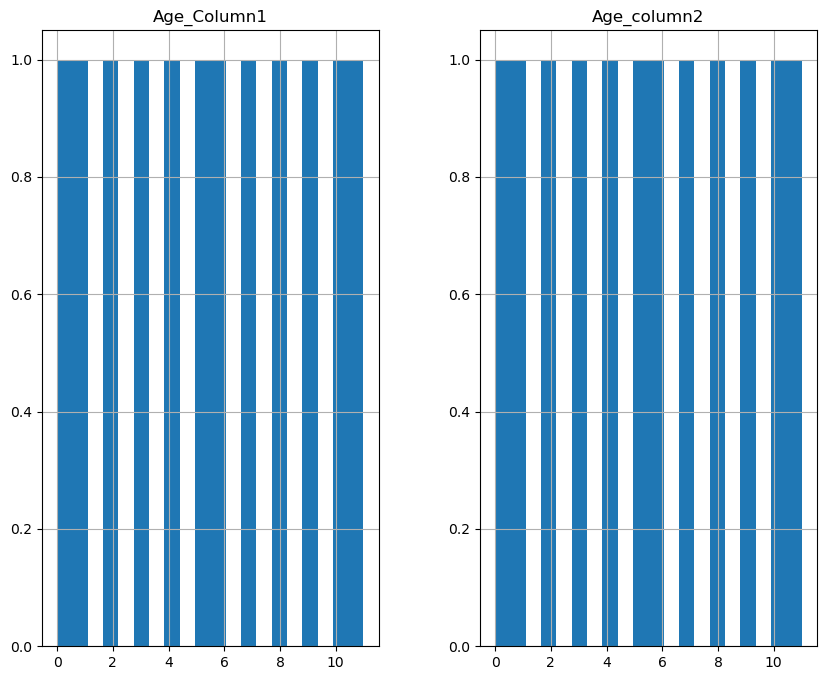

In [88]:
df.hist(bins=20, figsize=(10, 8))
plt.show()

**Observation**

'df.hist(bins=20, figsize=(10,8))' generates histograms for each numerical column in the dataset with 20 bins for each histogram. This histogram visually represents the distribution of values within each feature.

In [ ]:
#Boxplots

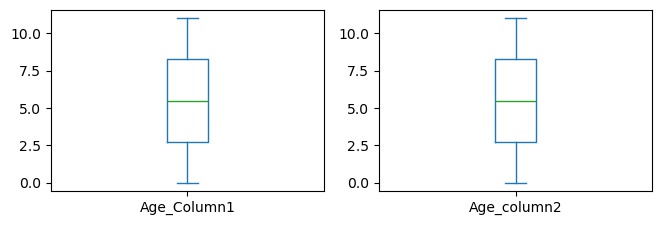

In [89]:
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(12,8))
plt.show()

This generates the box plot for each feature in the dataset to visualize the distribution and identify outliers. By using 'sunplots=True' individual box plots are created for each column arranged in 3*3 layout for better readability. The 'figsize(12,8)' parameter checks that the plots are large enough for clear visualization. 

In [ ]:
#Correlation matrix

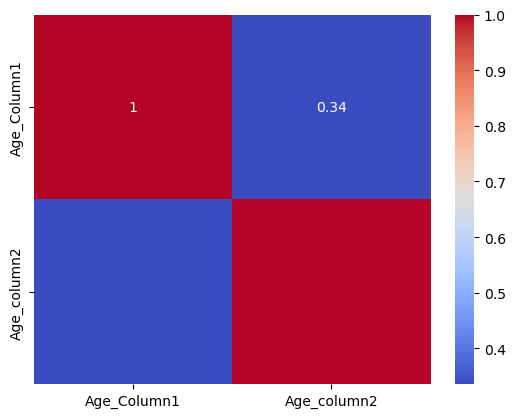

In [90]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

**Step 3:Feature Engineering**

In [91]:
df_encoder = pd.get_dummies(df,drop_first=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded)

df_scaled = pd.DataFrame(scaled_features, columns=df_encoded.columns)
print(df_scaled.head())

   Age_Column1  Age_column2
0    -1.593255    -1.013890
1    -1.013890    -1.303572
2     1.593255    -0.724207
3    -1.303572     0.144841
4    -0.434524    -1.593255


**Observation**

The 'pd.get_dummies(df, drop_first=True)' function was used to convert categorical variables into a numerical format that can be used by ML algorithm.
By setting 'drop_first=True' one level of each categorical variable was dropped to avoid multicollinearity reduction in the dataset.

The 'StandardScaler(0' was applied to standardize the numerical features of the dataset. This technique adjusts the data. so that each feature has a mean of 0 and a standard deviation of 1.

Standardization is important for models that rely on distance calculations such as Decision Tress to check that all features contribute equally to the model.

The scaled features were stored in a new DataFrame 'df_scaled' with the same column names as the original encoded DataFrame.
This data frame will be used in subsequent modeling steps to check that the model performance optimal by using standardized data



**Step 4: Decision Tree Classification**

In [92]:
print(y.unique())

[-1  1  0]


In [93]:
print(y.dtype)

int32


In [94]:
if y.dtype in ['float64' , 'float32']:
    y = y.astype(int)

**Observation**

In this I checked the data type of the target variable 'y'. If 'y' is of type 'float64' or 'float32' it is converted to an integer type using 'astype(int)'.This is done to check that the target variable is in a suitable format for classification tasks as decision tree classifiers typically require the target variable to be categorical or integer-based rather than continuous float values

In [95]:
if y.dtype == 'object' or y.dtype.name == 'category':
    y = y.astype('category').cat.codes

**Observation**

first checked if the data type of 'y' is 'object' or 'category' This is important because categorical data needs to be converted into a numeric format for ML algorithms
If the condition is true we should covert 'y' to a categorical type using 'astype('category')
'cat. codes' is used to assign numeric codes to each category.This conversion is necessary because many ML algorithms including Decision Trees require numeric input


In [97]:
y_binned = pd.cut(y,bins=3, labels=[0, 1, 2])

**Observation**

The 'pd.cut' function is used to convert continuous numerical data into discrete categories. This is used for transforming a continuous target variable into a categorical one which is required for classification tasks.
The 'pd.cut' function divides the data into discrete intervals or bins.
'y': This is a continuous target variable that we want to bin.
'bins=3': Specifies that we want to divide the data into 3 bins or categories.
'labels=[0, 1, 2]': Assigns labels to the these bins. The resulting categorical values will be '0', '1', and '2' corresponding to the intervals created by the binning.

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

          -1       0.50      1.00      0.67         1
           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3

Confusion Matrix:
 [[1 0 0]
 [0 1 0]
 [1 0 0]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Observation**

First, the dataset is divided into training and testing sets using 80-20 split. This means that 805 of the data is used to train the model while 20% is used to evaluate its performance. The 'random_state' checks that the split is reproducible.
A Decision Tree Classifier is initialized with a fixed 'random_state' to check consistent results across different runs. The DecisionTreeClassifier will be used to build a classification model based on the training data
The Decision Tree model is trained on the training data ('X_train' and 'y_train') This process involves learning patterns and rules from training data to classify the data points.

The trained model is used to make predictions on the testing data('X_test'). These predictions ('y_pred') represent the model's attempt to classify the test data.

The performance of the model is evaluated using several metrics:
Accuracy: The proportion of correctly classified instances out of the total instance. It gives an overall measure of how well the model is performing.
Classification Report: Provides detailed metrics such as precision, recall, and F1-score for each class. Precision measures the accuracy of positive predictions, recall measures the ability to find all positive instances and F1-score is the harmonic mean of precision and recall.
Confusion Matrix: A matrix that shows the number of true positives, False positives, true negatives, and false negatives. It helps to understand where the model is making
errors.

**Step 5: Hyperparameter Tuning**

In [99]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3,5,7,10],
    'min_samples_split':[2,5,10],
    'criterion':['gini', 'entropy']
}


grid_search = GridSearchCV(clf, param_grid, cv=5,scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Optimized Model Accuracy", accuracy_score(y_test, y_pred_best))
print("Optimized Classification Report:\n", classification_report(y_test, y_pred_best))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 10}
Best Cross-Validation Score: 0.6
Optimized Model Accuracy 0.3333333333333333
Optimized Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Observation**

The 'param_grid' dictionary is defined with different values for hyperparameters of the Decision Tree model. These parameters include 'max_depth', 'min_samples_split' and 'criterion'. This grid helps explore different combinations to find the best model.

'GridSearchCV' is initialized with the Decision Tree model('clf') the parameter grid('param_grid').5 -fold cross-validation('cv=5') and the 'accuracy' scoring metric. This setup is for systematic tuning of hyperparameters and evaluation of the model's performance.

The 'grid_search.fit(X_train, y_train)' function performs the grid search by training multiple models with different hyperparameter combinations and evaluating their performance using cross-validation.

After fitting the grid search the best combination of hyperparameters is obtained using 'grid_search.best_params' and the best cross-validation score (;grid_search.best_score_') is printed showing the highest accuracy achieved during the grid search.

The best model from the grid search is used to make predictions on the test set('y_pred_best'). The accuracy of this optimized model is then calculated and displayed using 'accuracy_score'.The classification report is also generated to provide detailed performance metrics, including precision, recall, and F1-score.

This helps in understanding which hyperparameters yield the best performance for the Decision Tree model. By evaluating the optimized model's accuracy and classification report.

**Step 6 Model Evaluation and Analysis**

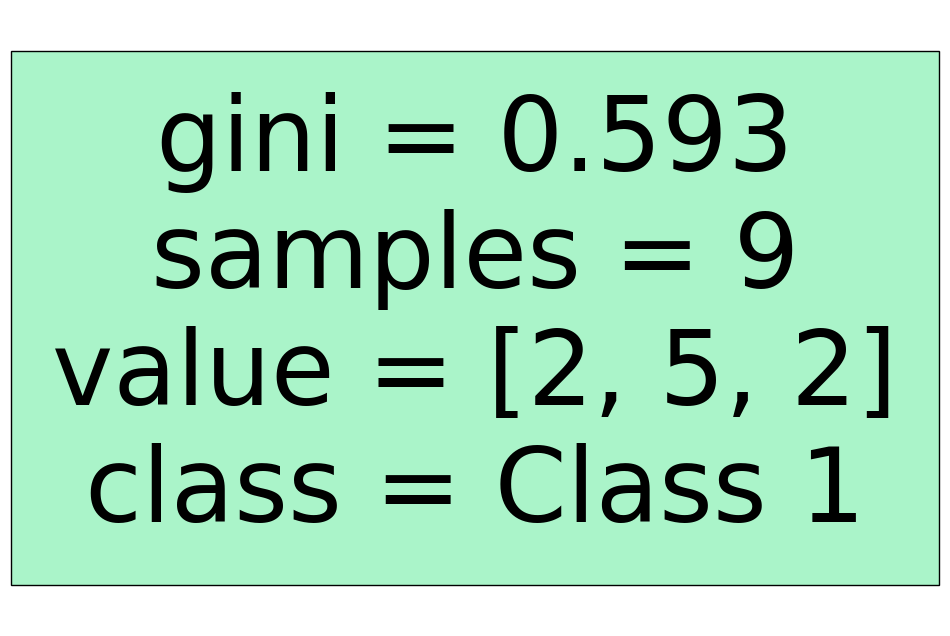

Feature Importance:
         Feature  Importance
0  Age in years         0.0


In [100]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.show()

importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance_df)
    

**Observation**

This code snippet visualizes the structure of the trained Decision tree model using 'plot_tree'.
'plt.figure(figsize=(12,8))': Sets the size of the plot to 12* 8 inches for better visibility.
'plot_tree(best_model, filled_True, feature_names=X.columns,class_names['Class 0;, 'Class 1'])': Plots the tree with filled colors showing the feature names and class names.
alt last displays the plot
This visualization provides a graphical representation of the decision-making process of the model, highlighting how decisions are made based on different feature values. This helps in understanding which features are most influential in the model's predictions.

And the next it calculates and displays the importance of each feature in the Decision tree model

'importance = best_model.feature_importances_:Extracts the importance scores for each feature from the trained model.
'pd.DataFrame({...}0.sort_values(by='Importance', ascending=False0'" Creates a DataFrame with feature names and their corresponding importance score, and sorts them in descending order of importance.
'print("Feature Importance:\n', feature_importance_df)': Prints the sorted data frame showing feature importance

The feature importance scores indicate how much each feature contributes to the model's predictions. Higher scores signify more influence. Analyzing these scores helps identify which features are most crucial for the models decision-making.

**Interview Questions:**

1. Common Hyperparameters of Decision Tree Models:

max_depth: Limits the depth of the tree. Depper trees can model more complex patterns but may overfit.

min_samples_split: The minimum number is samples required to split an internal node. Higher values prevent the model from learning overly specific patterns.

criterion: The function to measure the quality of a split


2. Difference Between Label Encoding and One-hot Encoding:
Label Encoding: Converts categorical values into numerical values

One-hot Encoding: Converts categorical values into binary columns where each category is represented by a separate column